In [1]:
import  os
import  tensorflow as tf
import  numpy as np
from    tensorflow import keras
from utils import LoadFishDataUtil
from    tensorflow.keras import datasets, layers, optimizers, models
from    tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
import pathlib
import h5py


In [2]:
#data_dir ='/media/xingbo/Storage/fish_identification/data/SESSION_TENT/SESSION1'
data_dir ='/media/xingbo/Storage/fish_identification/data/SESSION_AQUARIUM/case6/train'
data_dir_path = pathlib.Path(data_dir)
image_count = len(list(data_dir_path.glob('*/*.png')))
print('total images:',image_count)
BATCH_SIZE = 8
IMG_SIZE=160
IMG_WIDTH=320
IMG_HEIGHT=60

total images: 2750


In [3]:
CLASS_NAMES=None
SPLIT_WEIGHTS=(0.7, 0.3, 0.0)# train cv val vs test
myloadData = LoadFishDataUtil(data_dir,BATCH_SIZE,IMG_WIDTH,IMG_HEIGHT,CLASS_NAMES,SPLIT_WEIGHTS)
train_dataset,val_dataset,test_dataset,STEPS_PER_EPOCH, CLASS_NAMES,class_num = myloadData.loadFishData()
input_shape=(IMG_WIDTH,IMG_HEIGHT, 3)
print('total class:',class_num)


Tensor("Equal:0", shape=(313,), dtype=bool)
total class: 313


In [4]:
train_dataset_num_elements = tf.data.experimental.cardinality(train_dataset).numpy()
val_dataset_num_elements = tf.data.experimental.cardinality(val_dataset).numpy()
test_dataset_num_elements = tf.data.experimental.cardinality(test_dataset).numpy()
print(f"train_dataset_num_elements {train_dataset_num_elements}, val_dataset_num_elements {val_dataset_num_elements}, test_dataset_num_elements {test_dataset_num_elements}")


train_dataset_num_elements 1924, val_dataset_num_elements 825, test_dataset_num_elements 0


In [5]:
weight_decay = 0.000

model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), padding='same', input_shape=input_shape,
                        kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(1024, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())

model.add(layers.Dropout(0.5))
model.add(layers.Dense(class_num))
#model.add(layers.Activation('softmax'))

In [6]:
# build model and optimizer
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
model.compile(optimizer=keras.optimizers.Adam(0.001),
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 320, 60, 64)       1792      
_________________________________________________________________
activation (Activation)      (None, 320, 60, 64)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 320, 60, 64)       256       
_________________________________________________________________
dropout (Dropout)            (None, 320, 60, 64)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 320, 60, 64)       36928     
_________________________________________________________________
activation_1 (Activation)    (None, 320, 60, 64)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 320, 60, 64)       2

## training 


In [7]:
epochs = 20
validation_steps = 20
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
# This callback will stop the training when there is no improvement in
# the validation loss for three consecutive epochs.
# train
history=model.fit(train_dataset, epochs=epochs,
                  #callbacks=[callback],
          validation_data=val_dataset, verbose=1, validation_steps=validation_steps)


Train for 1924 steps, validate for 20 steps
Epoch 1/20
1924/1924 [==============================] - 71s 37ms/step - loss: 5.1509 - accuracy: 0.0847 - val_loss: 6.0871 - val_accuracy: 0.0375
Epoch 2/20
1924/1924 [==============================] - 66s 34ms/step - loss: 2.2775 - accuracy: 0.4493 - val_loss: 3.9746 - val_accuracy: 0.3063
Epoch 3/20
1924/1924 [==============================] - 66s 35ms/step - loss: 0.9251 - accuracy: 0.7424 - val_loss: 1.3164 - val_accuracy: 0.7437
Epoch 4/20
1924/1924 [==============================] - 66s 34ms/step - loss: 0.5418 - accuracy: 0.8462 - val_loss: 0.0862 - val_accuracy: 0.9500
Epoch 5/20
1924/1924 [==============================] - 67s 35ms/step - loss: 0.3726 - accuracy: 0.8904 - val_loss: 1.5420 - val_accuracy: 0.7875
Epoch 6/20
1924/1924 [==============================] - 67s 35ms/step - loss: 0.3129 - accuracy: 0.9085 - val_loss: 0.2061 - val_accuracy: 0.9500
Epoch 7/20
1924/1924 [==============================] - 67s 35ms/step - loss: 0.

In [8]:
# evaluate on test set
#scores = model.evaluate(test_dataset, verbose=1)
#print("Final test loss and accuracy :", scores)

In [9]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

<Figure size 800x800 with 2 Axes>

## Save model

In [10]:
# Save the model
# model.save('vggfish.h5py')

In [11]:
model.save_weights('model/vggfish20191126_STLT15.h5')

In [12]:
model.load_weights('model/vggfish20191126_STLT15.h5')

# extract feature
## SESSION3

In [22]:
test_data_dir ='/media/xingbo/Storage/fish_identification/data/SESSION_AQUARIUM/case6/test/SESSION3'
BATCH_SIZE = 8
CLASS_NAMES=np.load('/media/xingbo/Storage/fish_identification/data/CLASS_NAMES.npy')

testloadData = LoadFishDataUtil(test_data_dir,BATCH_SIZE,IMG_WIDTH,IMG_HEIGHT,CLASS_NAMES)
sess2_test_dataset,sess2_class_num = testloadData.loadTestFishData()
test_num_elements = tf.data.experimental.cardinality(sess2_test_dataset).numpy()
print(f"we have total {test_num_elements} batches of images for testing, around {test_num_elements*BATCH_SIZE} samples")
# evaluate on test set
#scores = model.evaluate(sess2_test_dataset, verbose=1)
#print("Final test loss and accuracy :", scores)
from numpy import linalg as LA
feats = []
names = []
feature_model = models.Model(inputs=model.input, outputs=model.get_layer('batch_normalization_13').output)
n = 0
for image_batch, label_batch in sess2_test_dataset:
    feature=model(image_batch)
    
    #print(n)
    #print(feature.shape[0])
    for i in range(feature.shape[0]):
        n=n+1
        feats.append(feature[i])
        names.append(np.argwhere(label_batch[i]).ravel())
        indxmax=np.argmax(feature[i])
        #print('predictions max index:',indxmax)
        #print('predictions:', CLASS_NAMES[indxmax] )
        #print('real:', CLASS_NAMES[np.argwhere(label_batch[i]).ravel()])
       
print(f"finanly we have {n} samples extracted features")
feats3 = np.array(feats)
names3 = np.array(names)


we have total 98 images in this folder
Tensor("Equal:0", shape=(328,), dtype=bool)
we have total 13 batches of images for testing, around 104 samples
finanly we have 98 samples extracted features


In [23]:
test_data_dir ='/media/xingbo/Storage/fish_identification/data/SESSION_AQUARIUM/case6/test/SESSION2'
BATCH_SIZE = 8
testloadData = LoadFishDataUtil(test_data_dir,BATCH_SIZE,IMG_WIDTH,IMG_HEIGHT,CLASS_NAMES)
sess2_test_dataset,sess2_class_num = testloadData.loadTestFishData()
test_num_elements = tf.data.experimental.cardinality(sess2_test_dataset).numpy()
print(f"we have total {test_num_elements} batches of images for testing, around {test_num_elements*BATCH_SIZE} samples")

feats = []
names = []
feature_model = models.Model(inputs=model.input, outputs=model.get_layer('batch_normalization_13').output)
n = 0
for image_batch, label_batch in sess2_test_dataset:
    feature=model(image_batch)
    for i in range(feature.shape[0]):
        n=n+1
        feats.append(feature[i])
        names.append(np.argwhere(label_batch[i]).ravel())
        indxmax=np.argmax(feature[i])
       
print(f"finanly we have {n} samples extracted features")
feats2 = np.array(feats)
names2 = np.array(names)


we have total 138 images in this folder
Tensor("Equal:0", shape=(328,), dtype=bool)
we have total 18 batches of images for testing, around 144 samples
finanly we have 138 samples extracted features


In [24]:
test_data_dir ='/media/xingbo/Storage/fish_identification/data/SESSION_AQUARIUM/case6/test/SESSION1_LT'
BATCH_SIZE = 8
testloadData = LoadFishDataUtil(test_data_dir,BATCH_SIZE,IMG_WIDTH,IMG_HEIGHT,CLASS_NAMES)
sess2_test_dataset,sess2_class_num = testloadData.loadTestFishData()
test_num_elements = tf.data.experimental.cardinality(sess2_test_dataset).numpy()
print(f"we have total {test_num_elements} batches of images for testing, around {test_num_elements*BATCH_SIZE} samples")

feats = []
names = []
feature_model = models.Model(inputs=model.input, outputs=model.get_layer('batch_normalization_13').output)
n = 0
for image_batch, label_batch in sess2_test_dataset:
    feature=model(image_batch)
    for i in range(feature.shape[0]):
        n=n+1
        feats.append(feature[i])
        names.append(np.argwhere(label_batch[i]).ravel())
        indxmax=np.argmax(feature[i])
       
print(f"finanly we have {n} samples extracted features")
feats1 = np.array(feats)
names1 = np.array(names)





we have total 134 images in this folder
Tensor("Equal:0", shape=(328,), dtype=bool)
we have total 17 batches of images for testing, around 136 samples
finanly we have 134 samples extracted features


In [25]:
# asciiList = [n.encode("ascii", "ignore") for n in names]
# directory for storing extracted features
feats_save_path = '/media/xingbo/Storage/fish_identification/data/STLT15session.h5'
print ("--------------------------------------------------")
print ("      writing feature extraction results ...")
print ("--------------------------------------------------")

h5f = h5py.File(feats_save_path, 'w')
h5f.create_dataset('Session3_features_merge3session', data=feats3)
h5f.create_dataset('Session3_names_merge3session', data=names3)

h5f.create_dataset('Session2_features_merge3session', data=feats2)
h5f.create_dataset('Session2_names_merge3session', data=names2)

h5f.create_dataset('Session1_features_merge3session', data=feats1)
h5f.create_dataset('Session1_names_merge3session', data=names1)

#np.save('/media/xingbo/Storage/fish_identification/data/CLASS_NAMES.npy', CLASS_NAMES)

h5f.close()

--------------------------------------------------
      writing feature extraction results ...
--------------------------------------------------


# load features

In [26]:

feats_save_path = '/media/xingbo/Storage/fish_identification/data/STLT15session.h5'
print ("--------------------------------------------------")
print ("      reading feature extraction results ...")
print ("--------------------------------------------------")

h5f = h5py.File(feats_save_path, 'r')
Session1_features = h5f['Session1_features_merge3session'][:]
Session1_names = h5f['Session1_names_merge3session'][:]

Session2_features = h5f['Session2_features_merge3session'][:]
Session2_names = h5f['Session2_names_merge3session'][:]

Session3_features = h5f['Session3_features_merge3session'][:]
Session3_names = h5f['Session3_names_merge3session'][:]

h5f.close()
        

--------------------------------------------------
      reading feature extraction results ...
--------------------------------------------------


# matching session1 vs session 2

In [27]:
# extract query image's feature, compute simlarity score and sort
scores = np.dot(Session1_features, Session2_features.T)
print(scores.shape)
from numpy.linalg import norm
res = 1 - np.dot(Session1_features/norm(Session1_features, axis=1)[...,None],(Session2_features/norm(Session2_features,axis=1)[...,None]).T)
res = 1-res/2
lable = Session1_names == Session2_names.T
lable2 = Session1_names != Session2_names.T

gscores=res[lable]
print(gscores.shape)
iscores=res[lable2]
print(iscores.shape)

(134, 138)
(1230,)
(17262,)


In [28]:
import bob.measure
iscores1vs2 = iscores.astype('float64')
gscores1vs2=gscores.astype('float64') 

In [29]:
EER1vs2 = bob.measure.eer(iscores1vs2, gscores1vs2)
print(f"we can achieve EER with {EER1vs2}")

we can achieve EER with 0.3782261049930624


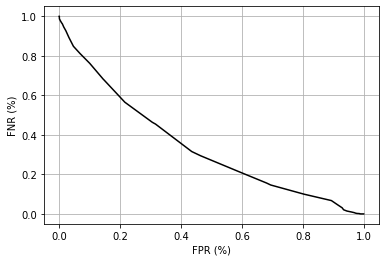

In [30]:
from matplotlib import pyplot
# we assume you have your negatives and positives already split
npoints = 100
bob.measure.plot.roc(iscores1vs2, gscores1vs2, npoints, color=(0,0,0), linestyle='-', label='test') 
pyplot.xlabel('FPR (%)') 
pyplot.ylabel('FNR (%)') 
pyplot.grid(True)
pyplot.show() 

# matching session1 vs session 3


(134, 98)
(878,)
(12254,)
we can achieve EER with 0.46924141361678934


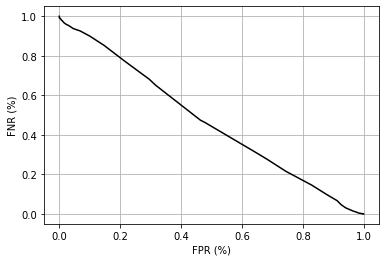

In [31]:
# extract query image's feature, compute simlarity score and sort
scores = np.dot(Session1_features, Session3_features.T)
print(scores.shape)
from numpy.linalg import norm
res = 1 - np.dot(Session1_features/norm(Session1_features, axis=1)[...,None],(Session3_features/norm(Session3_features,axis=1)[...,None]).T)
res = 1-res/2
lable = Session1_names == Session3_names.T
lable2 = Session1_names != Session3_names.T

gscores=res[lable]
print(gscores.shape)
iscores=res[lable2]
print(iscores.shape)

import bob.measure
iscores1vs3 = iscores.astype('float64')
gscores1vs3=gscores.astype('float64') 
EER1vs3 = bob.measure.eer(iscores1vs3, gscores1vs3)
print(f"we can achieve EER with {EER1vs3}")
from matplotlib import pyplot
# we assume you have your negatives and positives already split
npoints = 100
bob.measure.plot.roc(iscores1vs3, gscores1vs3, npoints, color=(0,0,0), linestyle='-', label='test') 
pyplot.xlabel('FPR (%)') 
pyplot.ylabel('FNR (%)') 
pyplot.grid(True)
pyplot.show() 

# matching session2 vs session 3


(138, 98)
(904,)
(12620,)
we can achieve EER with 0.42787593088649845


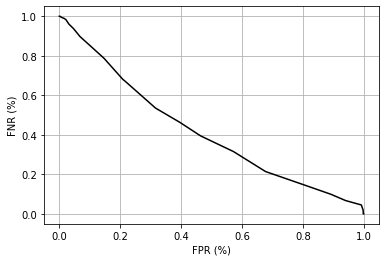

In [32]:
# extract query image's feature, compute simlarity score and sort
scores = np.dot(Session2_features, Session3_features.T)
print(scores.shape)
from numpy.linalg import norm
res = 1 - np.dot(Session2_features/norm(Session2_features, axis=1)[...,None],(Session3_features/norm(Session3_features,axis=1)[...,None]).T)
res = 1-res/2
lable = Session2_names == Session3_names.T
lable2 = Session2_names != Session3_names.T

gscores=res[lable]
print(gscores.shape)
iscores=res[lable2]
print(iscores.shape)

import bob.measure
iscores2vs3 = iscores.astype('float64')
gscores2vs3=gscores.astype('float64') 
EER2vs3 = bob.measure.eer(iscores2vs3, gscores2vs3)
print(f"we can achieve EER with {EER2vs3}")
from matplotlib import pyplot
# we assume you have your negatives and positives already split
npoints = 100
bob.measure.plot.roc(iscores2vs3, gscores2vs3, npoints, color=(0,0,0), linestyle='-', label='test') 
pyplot.xlabel('FPR (%)') 
pyplot.ylabel('FNR (%)') 
pyplot.grid(True)
pyplot.show() 

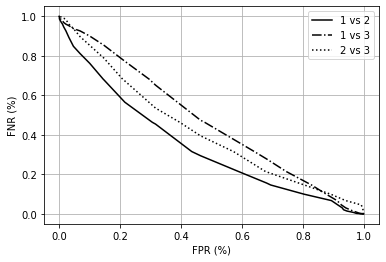

we can achieve EER1vs2 with 0.3782261049930624
we can achieve EER1vs3 with 0.46924141361678934
we can achieve EER2vs3 with 0.42787593088649845


In [33]:
from matplotlib import pyplot
# we assume you have your negatives and positives already split
npoints = 100
bob.measure.plot.roc(iscores1vs2, gscores1vs2, npoints, color=(0,0,0), linestyle='-', label='1 vs 2') 
bob.measure.plot.roc(iscores1vs3, gscores1vs3, npoints, color=(0,0,0), linestyle='-.', label='1 vs 3') 
bob.measure.plot.roc(iscores2vs3, gscores2vs3, npoints, color=(0,0,0), linestyle=':', label='2 vs 3') 
pyplot.xlabel('FPR (%)') 
pyplot.ylabel('FNR (%)') 
pyplot.legend()
pyplot.grid(True)
pyplot.show() 

print(f"we can achieve EER1vs2 with {EER1vs2}")
print(f"we can achieve EER1vs3 with {EER1vs3}")
print(f"we can achieve EER2vs3 with {EER2vs3}")


# intra session

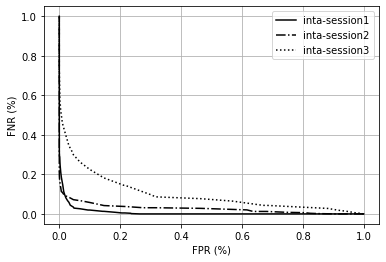

we can achieve EER1vs1 with 0.03945006164072132
we can achieve EER2vs2 with 0.06730612199596317
we can achieve EER3vs3 with 0.16973585540281982


In [34]:
import bob.measure
from matplotlib import pyplot
from numpy.linalg import norm



res = 1 - np.dot(Session1_features/norm(Session1_features, axis=1)[...,None],(Session1_features/norm(Session1_features,axis=1)[...,None]).T)
res = 1-res/2
lable = Session1_names == Session1_names.T
lable2 = Session1_names != Session1_names.T

gscores=res[lable]
iscores=res[lable2]

iscores1vs1 = iscores.astype('float64')
gscores1vs1=gscores.astype('float64') 
EER1vs1 = bob.measure.eer(iscores1vs1, gscores1vs1)

res = 1 - np.dot(Session2_features/norm(Session2_features, axis=1)[...,None],(Session2_features/norm(Session2_features,axis=1)[...,None]).T)
res = 1-res/2
lable = Session2_names == Session2_names.T
lable2 = Session2_names != Session2_names.T

gscores=res[lable]
iscores=res[lable2]

iscores2vs2 = iscores.astype('float64')
gscores2vs2=gscores.astype('float64') 
EER2vs2 = bob.measure.eer(iscores2vs2, gscores2vs2)

res = 1 - np.dot(Session3_features/norm(Session3_features, axis=1)[...,None],(Session3_features/norm(Session3_features,axis=1)[...,None]).T)
res = 1-res/2
lable = Session3_names == Session3_names.T
lable2 = Session3_names != Session3_names.T

gscores=res[lable]
iscores=res[lable2]

iscores3vs3 = iscores.astype('float64')
gscores3vs3=gscores.astype('float64') 
EER3vs3 = bob.measure.eer(iscores3vs3, gscores3vs3)


from matplotlib import pyplot
# we assume you have your negatives and positives already split
npoints = 100
bob.measure.plot.roc(iscores1vs1, gscores1vs1, npoints, color=(0,0,0), linestyle='-', label='inta-session1') 
bob.measure.plot.roc(iscores2vs2, gscores2vs2, npoints, color=(0,0,0), linestyle='-.', label='inta-session2') 
bob.measure.plot.roc(iscores3vs3, gscores3vs3, npoints, color=(0,0,0), linestyle=':', label='inta-session3') 
pyplot.xlabel('FPR (%)') 
pyplot.ylabel('FNR (%)') 
pyplot.legend()
pyplot.grid(True)
pyplot.show() 
print(f"we can achieve EER1vs1 with {EER1vs1}")
print(f"we can achieve EER2vs2 with {EER2vs2}")
print(f"we can achieve EER3vs3 with {EER3vs3}")
